<a href="https://colab.research.google.com/github/gvigkannan/Model_ADay/blob/Keras/VGG16_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.random import shuffle
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical

In [ ]:
# Based on the layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# Loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


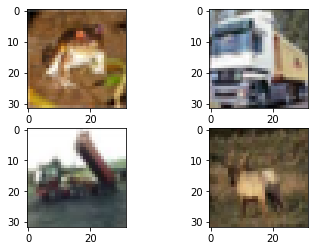

In [ ]:
for i in range(4):
    plt.subplot(220 + 1 + i)
    plt.imshow(x_train[i])
    

In [ ]:
def preprocess_data():
    """
    Performs the following operation
    1. Import dataset from keras.datasets
    2. Converts targets into categorical datatype.
    """
    
    # Load dataset
    (x_train, y_train),(x_test, y_test) = cifar10.load_data()

    # One Hot Encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Normalize
    x_train = x_train.astype('float32')
    x_train /= 255.0
    x_test = x_test.astype('float32')
    x_test /= 255.0

    return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = preprocess_data()

In [ ]:
def summarize(history, filename = 'VGG16'):
    plt.figure(figsize = (7,7))
    plt.subplot(211)
    plt.title('Cross Entropy Loss', c = 'c')
    plt.plot(history.history['loss'], 
             color = 'b',
             label = 'train')
    plt.plot(history.history['val_loss'],
             color = 'orange',
             label = 'test')
    plt.xticks(c = 'g')
    plt.yticks(c = 'g')
    plt.legend()
    plt.subplot(212)
    plt.title('Classification Accuracy', c = 'c')
    plt.plot(history.history['accuracy'], 
             color = 'b',
             label = 'train')
    plt.plot(history.history['val_accuracy'],
             color = 'orange',
             label = 'test')
    plt.xticks(c = 'g')
    plt.yticks(c = 'g')
    plt.tight_layout(h_pad = 2)
    plt.legend()
    plt.savefig(filename + '_plot.png')
    plt.show()


# Model: VGG16 - Base Model
* Two Convolution Layers and One Dense Layer
* No regularization
* For ten epochs: val_accuracy = 63% 
* For ten epochs: train_accuracy = 73%.
* Clearly overfitting!

In [ ]:
# Defining a variant of VGG16 Model
def VGG16_model_L2D1():
    filter_size = [16,32,64,128]
    model = keras.Sequential()
    # First layer needs input size!
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same',
                     input_shape = (32, 32, 3)))
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(units = 128,
                    activation = 'relu',
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 10,
                    activation = 'softmax'))
    
    # Compiling Model
    opt = SGD(lr = 0.001, momentum = 0.9)
    model.compile(optimizer = opt, 
                  loss = 'categorical_crossentropy',
                  metrics = 'accuracy')
    return model

In [ ]:
# callbacks
my_callbacks = [keras.callbacks.EarlyStopping(patience = 10,
                                              monitor = 'val_loss',
                                              mode = 'min',
                                              verbose = 2),
                keras.callbacks.ModelCheckpoint(filepath="model_e{epoch:02d}_l{val_loss:.4f}.h5",
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                verbose = 2,
                                                save_best_only = True)]
                                    

In [ ]:
model_var1 = VGG16_model_L2D1()

In [ ]:
history_base = model_var1.fit(x_train, y_train, batch_size = 32,
                              epochs = 30, validation_split = 0.2,
                              verbose = 1, callbacks = my_callbacks)

Epoch 1/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.9961 - accuracy: 0.2881 - val_loss: 1.6386 - val_accuracy: 0.4120

Epoch 00001: val_accuracy improved from -inf to 0.41200, saving model to model_01-1.6386.h5
Epoch 2/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.5602 - accuracy: 0.4479 - val_loss: 1.4236 - val_accuracy: 0.4972

Epoch 00002: val_accuracy improved from 0.41200 to 0.49720, saving model to model_02-1.4236.h5
Epoch 3/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.3694 - accuracy: 0.5127 - val_loss: 1.2957 - val_accuracy: 0.5455

Epoch 00003: val_accuracy improved from 0.49720 to 0.54550, saving model to model_03-1.2957.h5
Epoch 4/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.2295 - accuracy: 0.5623 - val_loss: 1.2444 - val_accuracy: 0.5663

Epoch 00004: val_accuracy improved from 0.54550 to 0.56630, saving model to model_04-1.2444.h5
Epoch 5/10
1250/1250 [=============

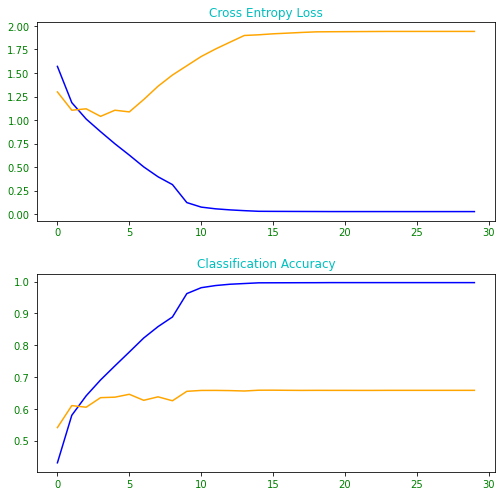

<Figure size 432x288 with 0 Axes>

In [ ]:
summarize(history_v2, filename = 'VGG16_L2D2')

# Model: VGG16 - Variant 2C2D


* Two Convolution Layers and Two Dense Layer
* No regularization
* Accuracy after 30 epochs:65% with train accuracy: 99.34%
* OVERFITTING!
* Time taken per epoch: 59s


In [ ]:
# Defining a variant of VGG16 Model
def VGG16_model_L2D2():
    filter_size = [16,32,64,128]
    model = keras.Sequential()
    # First layer needs input size!
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same',
                     input_shape = (32, 32, 3)))
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(units = 128,
                    activation = 'relu',
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 64, 
                    activation = 'relu', 
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 10,
                    activation = 'softmax'))
    
    # Compiling Model
    opt = keras.optimizers.SGD(learning_rate = 0.005, 
                               momentum  = 0.9)
    model.compile(optimizer = opt, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model    

In [ ]:
model_var2 = VGG16_model_L2D2()

In [ ]:
# Callbacks
my_callbacks_v3 = [keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 10,
                                              verbose = 2,
                                              mode = 'min'),
                keras.callbacks.ModelCheckpoint(filepath = 'epoch-{epoch:02d}-loss-{val_accuracy:.3f}.h5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                verbose = 2,
                                                save_best_only = True)]
                        

In [ ]:
# Callbacks
my_callbacks_v3 = [keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 10,
                                              verbose = 2,
                                              mode = 'min'),
                keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 5,
                                                  verbose = 2),
                keras.callbacks.ModelCheckpoint(filepath = 'epoch-{epoch:02d}-loss-{val_accuracy:.3f}.h5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                verbose = 2,
                                                save_best_only = True)]
                        

In [ ]:
# Callbacks
my_callbacks_v2 = [keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 5,
                                                  verbose = 2),
                keras.callbacks.ModelCheckpoint(filepath = 'VGG16_v2_e{epoch:02d}_l{val_accuracy:.3f}.h5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                verbose = 2,
                                                save_best_only = True)]
                        

In [ ]:
history_v2 = model_var2.fit(x_train, y_train, batch_size = 32,
                            epochs = 30,
                            callbacks = my_callbacks_v2,
                            validation_split = 0.2)

Epoch 1/30
1250/1250 [==============================] - 58s 46ms/step - loss: 1.7847 - accuracy: 0.3463 - val_loss: 1.2988 - val_accuracy: 0.5408

Epoch 00001: val_loss improved from inf to 1.29876, saving model to VGG16_v2_e01_l0.541.h5
Epoch 2/30
1250/1250 [==============================] - 58s 46ms/step - loss: 1.2136 - accuracy: 0.5671 - val_loss: 1.1044 - val_accuracy: 0.6099

Epoch 00002: val_loss improved from 1.29876 to 1.10442, saving model to VGG16_v2_e02_l0.610.h5
Epoch 3/30
1250/1250 [==============================] - 58s 46ms/step - loss: 1.0124 - accuracy: 0.6429 - val_loss: 1.1194 - val_accuracy: 0.6048

Epoch 00003: val_loss did not improve from 1.10442
Epoch 4/30
1250/1250 [==============================] - 57s 46ms/step - loss: 0.8633 - accuracy: 0.6942 - val_loss: 1.0392 - val_accuracy: 0.6349

Epoch 00004: val_loss improved from 1.10442 to 1.03920, saving model to VGG16_v2_e04_l0.635.h5
Epoch 5/30
1250/1250 [==============================] - 57s 46ms/step - loss: 0.

In [ ]:
def summarize(history, filename = 'VGG16'):
    plt.figure(figsize = (7,7))
    plt.subplot(211)
    plt.title('Cross Entropy Loss', c = 'c')
    plt.plot(history.history['loss'], 
             color = 'b',
             label = 'train')
    plt.plot(history.history['val_loss'],
             color = 'orange',
             label = 'test')
    plt.xticks(c = 'g')
    plt.yticks(c = 'g')
    plt.subplot(212)
    plt.title('Classification Accuracy', c = 'c')
    plt.plot(history.history['accuracy'], 
             color = 'b',
             label = 'train')
    plt.plot(history.history['val_accuracy'],
             color = 'orange',
             label = 'test')
    plt.xticks(c = 'g')
    plt.yticks(c = 'g')
    plt.tight_layout(h_pad = 2)
    plt.show()
    plt.savefig(filename + '_plot.png')


In [ ]:
model_var2.save('VGG16_L2D2_65.sav')

INFO:tensorflow:Assets written to: VGG16_L2D2_65.sav/assets


# VGG16 - Regularized Variants
1. Variant 1: Regularizing the Conv Layers
2. Variant 2: Regularizing the Dense Layers
3. Variant 3: Regularizing both



## Variant 1:
1. Two Convolution Layer, Two Dense
2. Regularized Conv Layers - L1_L2
3. Val Accuracy: 49.8% after 15 epochs
4. Train Accuracy: 51% after 15 epochs
5. Time taken per epoch: 80s

In [ ]:
# Callbacks
my_callbacks_v3 = [keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 10,
                                              verbose = 2,
                                              mode = 'min'),
                   keras.callbacks.ModelCheckpoint(filepath = 'epoch-{epoch:02d}-loss-{val_accuracy:.3f}.h5',
                                                monitor = 'val_loss',
                                                mode = 'min',
           
                                                verbose = 2,
                                                save_best_only = True)]
                        

In [ ]:
# Defining a variant of VGG16 Model
def VGG16_model_L2D2_Regularized():
    filter_size = [16,32,64,128]
    model = keras.Sequential()
    # First layer needs input size!
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     kernel_regularizer = keras.regularizers.l1_l2(),
                     padding = 'same',
                     input_shape = (32, 32, 3)))
    model.add(Conv2D(filters = filter_size[1],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     kernel_regularizer = keras.regularizers.l1_l2(),
                     padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(units = 128,
                    activation = 'relu',
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 64, 
                    activation = 'relu', 
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 10,
                    activation = 'softmax'))
    
    # Compiling Model
    opt = keras.optimizers.SGD(learning_rate = 0.005, 
                               momentum  = 0.9)
    model.compile(optimizer = opt, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model    

In [ ]:
model_v3_1 = VGG16_model_L2D2_Regularized()

In [ ]:
history_v3_1 = model_v3_1.fit(x_train, y_train,
                              batch_size = 32, 
                              epochs = 15,
                              callbacks = my_callbacks_v3,
                              validation_split = 0.2)

Epoch 1/15
1250/1250 [==============================] - 81s 64ms/step - loss: 4.2330 - accuracy: 0.2703 - val_loss: 1.8843 - val_accuracy: 0.3763

Epoch 00001: val_loss improved from inf to 1.88435, saving model to epoch-01-loss-0.376.h5
Epoch 2/15
1250/1250 [==============================] - 77s 61ms/step - loss: 1.8581 - accuracy: 0.3950 - val_loss: 1.7270 - val_accuracy: 0.4405

Epoch 00002: val_loss improved from 1.88435 to 1.72697, saving model to epoch-02-loss-0.440.h5
Epoch 3/15
1250/1250 [==============================] - 77s 61ms/step - loss: 1.7461 - accuracy: 0.4339 - val_loss: 1.6860 - val_accuracy: 0.4589

Epoch 00003: val_loss improved from 1.72697 to 1.68598, saving model to epoch-03-loss-0.459.h5
Epoch 4/15
1250/1250 [==============================] - 77s 62ms/step - loss: 1.6787 - accuracy: 0.4622 - val_loss: 1.7122 - val_accuracy: 0.4472

Epoch 00004: val_loss did not improve from 1.68598
Epoch 5/15
1250/1250 [==============================] - 78s 63ms/step - loss: 1.

## Variant 2:
1. Two Convolution Layer, Two Dense
2. Regularized Conv Layers - Batch Norm
3. Test Accuracy: 63.84% after 15 epochs
4. Train Accuracy: 77.27% after 15 epochs
5. Time taken per epoch: 85s

Comments:
It was relatively faster compared to the others while using BatchNorm. But that isn't reflect in the time taken.

In [ ]:
# Defining a variant of VGG16 Model
def VGG16_model_L2D2_Regularized_v2():
    filter_size = [16,32,64,128]
    model = keras.Sequential()
    # First layer needs input size!
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same',
                     input_shape = (32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = filter_size[1],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(units = 128,
                    activation = 'relu',
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 64, 
                    activation = 'relu', 
                    kernel_initializer = 'he_uniform'))
    model.add(Dense(units = 10,
                    activation = 'softmax'))
    
    # Compiling Model
    opt = keras.optimizers.SGD(learning_rate = 0.005, 
                               momentum  = 0.9)
    model.compile(optimizer = opt, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model    

In [ ]:
model_v3_2 = VGG16_model_L2D2_Regularized_v2()
history_v3_2 = model_v3_2.fit(x_train, y_train,
                              batch_size = 32,
                              epochs = 15,
                              validation_split = 0.2,
                              callbacks = my_callbacks_v3)

Epoch 1/15
1250/1250 [==============================] - 90s 71ms/step - loss: 1.7048 - accuracy: 0.3874 - val_loss: 1.3400 - val_accuracy: 0.5402

Epoch 00001: val_loss improved from 1.54764 to 1.34001, saving model to epoch-01-loss-0.540.h5
Epoch 2/15
1250/1250 [==============================] - 89s 71ms/step - loss: 1.1176 - accuracy: 0.6035 - val_loss: 1.0461 - val_accuracy: 0.6318

Epoch 00002: val_loss improved from 1.34001 to 1.04612, saving model to epoch-02-loss-0.632.h5
Epoch 3/15
1250/1250 [==============================] - 87s 70ms/step - loss: 0.9022 - accuracy: 0.6832 - val_loss: 1.0845 - val_accuracy: 0.6146

Epoch 00003: val_loss did not improve from 1.04612
Epoch 4/15
1250/1250 [==============================] - 85s 68ms/step - loss: 0.7760 - accuracy: 0.7278 - val_loss: 1.0730 - val_accuracy: 0.6352

Epoch 00004: val_loss did not improve from 1.04612
Epoch 5/15
1250/1250 [==============================] - 87s 69ms/step - loss: 0.6388 - accuracy: 0.7727 - val_loss: 0.99

In [ ]:
model_v3_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [ ]:
model_v3_2.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.9852 - accuracy: 0.6384


[1.9851897954940796, 0.6384000182151794]

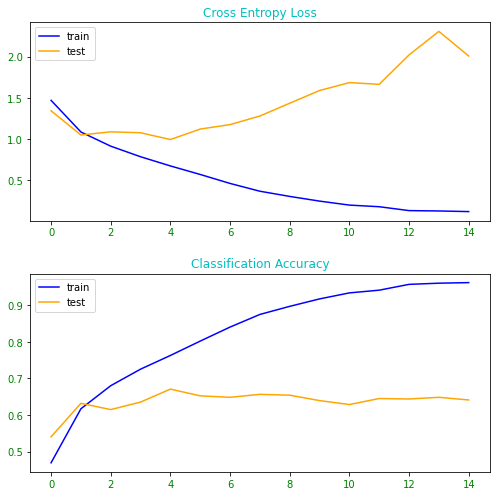

In [ ]:
summarize(history=history_v3_2, filename="VGG16_L2D2_BatchNorm")

## Variant 3: Dropout
1. Two Convolution Layer, Two Dense
2. Regularized Conv Layers - Batch Norm
3. Test Accuracy: 65.66% after 15 epochs
4. Train Accuracy: 74.66% after 15 epochs
5. Time taken per epoch: 82s
6. Params: 1.06M

Comments:
* Visibly slower after BatchNorm
* Comparatively, lesser overfit than just using BatchNorm. Definitely need more epochs to justify the same
* In all honestly, I changed the filter size in this one for the second conv layer


In [ ]:
# Defining a variant of VGG16 Model
def VGG16_model_L2D2_Regularized_v3():
    filter_size = [16,32,64,128]
    model = keras.Sequential()
    # First layer needs input size!
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same',
                     input_shape = (32, 32, 3)))
    model.add(Conv2D(filters = filter_size[1],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(units = 128,
                    activation = 'relu',
                    kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(units = 64, 
                    activation = 'relu', 
                    kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(units = 10,
                    activation = 'softmax'))
    
    # Compiling Model
    opt = keras.optimizers.SGD(learning_rate = 0.005, 
                               momentum  = 0.9)
    model.compile(optimizer = opt, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model    

In [ ]:
model_v3_Dropout = VGG16_model_L2D2_Regularized_v3()
model_v3_Dropout.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

In [ ]:
# callbacks
my_callbacks = [keras.callbacks.EarlyStopping(patience = 10,
                                              monitor = 'val_loss',
                                              mode = 'min',
                                              verbose = 2),
                keras.callbacks.ModelCheckpoint(filepath="Dropout-epoch-{epoch:02d}-loss_val-{val_loss:.4f}.h5",
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                verbose = 2,
                                                save_best_only = True)]

In [ ]:
history_v3_Dropout = model_v3_Dropout.fit(x_train, y_train, batch_size = 32,
                                    epochs = 15,
                                    callbacks = my_callbacks,
                                    validation_split = 0.2)

Epoch 1/15
1250/1250 [==============================] - 82s 65ms/step - loss: 2.0599 - accuracy: 0.2309 - val_loss: 1.4268 - val_accuracy: 0.4881

Epoch 00001: val_loss improved from inf to 1.42683, saving model to Dropout-epoch-01-loss_val-1.4268.h5
Epoch 2/15
1250/1250 [==============================] - 81s 65ms/step - loss: 1.5280 - accuracy: 0.4441 - val_loss: 1.2440 - val_accuracy: 0.5716

Epoch 00002: val_loss improved from 1.42683 to 1.24403, saving model to Dropout-epoch-02-loss_val-1.2440.h5
Epoch 3/15
1250/1250 [==============================] - 82s 66ms/step - loss: 1.3380 - accuracy: 0.5272 - val_loss: 1.1733 - val_accuracy: 0.5984

Epoch 00003: val_loss improved from 1.24403 to 1.17333, saving model to Dropout-epoch-03-loss_val-1.1733.h5
Epoch 4/15
1250/1250 [==============================] - 82s 66ms/step - loss: 1.2183 - accuracy: 0.5713 - val_loss: 1.0842 - val_accuracy: 0.6185

Epoch 00004: val_loss improved from 1.17333 to 1.08419, saving model to Dropout-epoch-04-los

In [ ]:
model_v3_Dropout.evaluate(x_test, y_test, verbose = 2)


313/313 - 5s - loss: 1.1047 - accuracy: 0.6561


[1.1046503782272339, 0.6560999751091003]

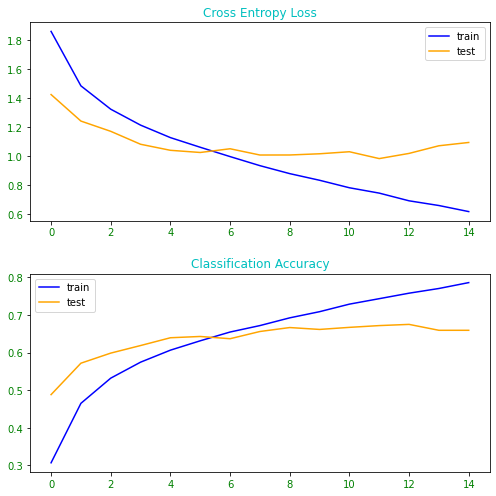

In [ ]:
summarize(history = history_v3_Dropout, filename= 'VGG16_L2D2_Dropout')

## Variant 4 - BatchNorm + Dropout
1. Two Convolution Layer, Two Dense
2. Regularized Conv Layers - Batch Norm
3. Test Accuracy: 64.46% after 15 epochs
4. Train Accuracy: 66.81% after 15 epochs
5. Time taken per epoch: ~90s
6. Params: 1.06M

Comments:
* Visibly slower after BatchNorm
* Comparatively, lesser overfit than just using BatchNorm. Definitely need more epochs to justify the same
* Training from Scratch is not a great idea.
* First trial is wrong because of the callbacks!

In [ ]:
# Defining a variant of VGG16 Model
def VGG16_model_L2D2_Regularized_v4():
    filter_size = [16,32,64,128]
    model = keras.Sequential()
    # First layer needs input size!
    model.add(Conv2D(filters = filter_size[0],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same',
                     input_shape = (32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = filter_size[1],
                     kernel_size = (3,3),
                     activation = 'relu',
                     kernel_initializer = 'he_uniform',
                     padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(units = 128,
                    activation = 'relu',
                    kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(units = 64, 
                    activation = 'relu', 
                    kernel_initializer = 'he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(units = 10,
                    activation = 'softmax'))
    
    # Compiling Model
    opt = keras.optimizers.SGD(learning_rate = 0.005, 
                               momentum  = 0.9) # Should I change you?
    model.compile(optimizer = opt, 
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model    

In [ ]:
# callbacks - Need to separately define it for every model. 
# Else it takes the previous iteration
my_callbacks = [keras.callbacks.EarlyStopping(patience = 10,
                                              monitor = 'val_loss',
                                              mode = 'min',
                                              verbose = 2),
                keras.callbacks.ModelCheckpoint(filepath="BN_Dropout-epoch-{epoch:02d}-loss_val-{val_loss:.4f}.h5",
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                verbose = 2,
                                                save_best_only = True)]

In [ ]:
model_BN_Dropout = VGG16_model_L2D2_Regularized_v4()
model_BN_Dropout.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)             

In [ ]:
history_BN_Dropout = model_BN_Dropout.fit(x_train, y_train,
                                          batch_size = 32,
                                          epochs = 15,
                                          callbacks = my_callbacks,
                                          validation_split = 0.2)


Epoch 1/15
1250/1250 [==============================] - 91s 72ms/step - loss: 2.2406 - accuracy: 0.1582 - val_loss: 1.8867 - val_accuracy: 0.2782

Epoch 00001: val_loss improved from inf to 1.88671, saving model to BN_Dropout-epoch-01-loss_val-1.8867.h5
Epoch 2/15
1250/1250 [==============================] - 90s 72ms/step - loss: 1.9329 - accuracy: 0.2197 - val_loss: 1.7428 - val_accuracy: 0.3045

Epoch 00002: val_loss improved from 1.88671 to 1.74284, saving model to BN_Dropout-epoch-02-loss_val-1.7428.h5
Epoch 3/15
1250/1250 [==============================] - 90s 72ms/step - loss: 1.7879 - accuracy: 0.2788 - val_loss: 1.5857 - val_accuracy: 0.3916

Epoch 00003: val_loss improved from 1.74284 to 1.58575, saving model to BN_Dropout-epoch-03-loss_val-1.5857.h5
Epoch 4/15
1250/1250 [==============================] - 91s 72ms/step - loss: 1.6401 - accuracy: 0.3643 - val_loss: 1.4116 - val_accuracy: 0.4959

Epoch 00004: val_loss improved from 1.58575 to 1.41156, saving model to BN_Dropout-

In [ ]:
model_BN_Dropout.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.0240 - accuracy: 0.6442


[1.0239847898483276, 0.6442000269889832]

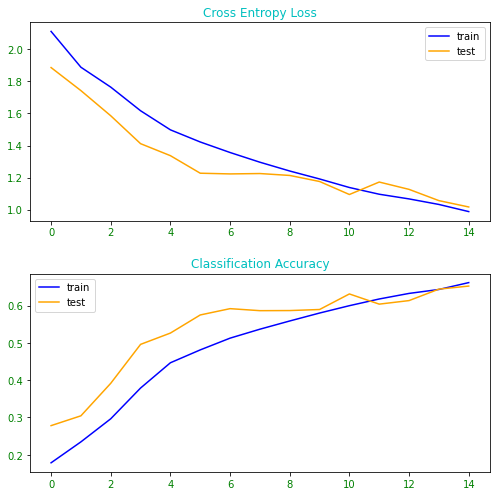

In [ ]:
summarize(history=history_BN_Dropout,
          filename = 'VGG16_BN_Dropout')

## Variant 4 - BatchNorm + Dropout - ELU
1. Two Convolution Layer, Two Dense
2. Regularized Conv Layers - Batch Norm
3. Test Accuracy: 64.46% after 15 epochs
4. Train Accuracy: 66.81% after 15 epochs
5. Time taken per epoch: ~90s
6. Params: 1.06M

Comments:
* Visibly slower after BatchNorm
* Comparatively, lesser overfit than just using BatchNorm. Definitely need more epochs to justify the same
* Training from Scratch is not a great idea.
* First trial is wrong because of the callbacks!